# CSE 482: Big Data Analysis (Spring 2019) Homework 2

Due date: February 20, 2019 (before midnight)

Submit your homework using the D2L system. Use the notebook below to write the solution of your homework. Make sure you submit the notebook along with its HTML version.

**1.** Consider the dataset shown in the table below.

<img src = "figure1.jpg" width="350">

Note that x1 through x9 are integer-valued counts sorted in ascending order (i.e., x1 corresponds to the lowest cell count while x9 has the highest cell count). Suppose we apply the following methods (equal interval width, equal frequency, and entropy-based) to discretize the blood cell count attribute into 3 bins. The bins obtained are listed below:

    - Equal Width: 
        - Bin 1: x1, x2  
        - Bin 2: x3, x4, x5, x6, x7, x8
        - Bin 3: x9

    - Equal Frequency: 
        - Bin 1: x1, x2, x3 
        - Bin 2: x4, x5, x6 
        - Bin 3: x7, x8, x9
    
    - Entropy-based discretization with smoking status as class attribute: 
        - Bin 1: x1, x2
        - Bin 2: x3, x4, x5
        - Bin 3: x6, x7, x8, x9

Explain the effect of applying each transformation below on the discretization methods listed above. Specifically, state whether the elements assigned to the bins can change to a different bin if you apply discretization on the transformed attribute values. 

(a) Centering the attribute: $x \rightarrow x - m$

(b) Standardizing the attribute: $x \rightarrow \frac{x - m}{s}$

(c) Applying logarithmic transform: $x \rightarrow \log(x)$

where x corresponds to one of the original blood count values (x1 to x9), m denotes the mean (average) value of the 9 numbers, and s denotes the standard deviation of the 9 numbers. Note: you do not need to know the exact values of x1 to x9 in order to answer this question. 

**Solution:**

 (a) Centering the attribute
 
     i. Equal-width: No change, max and min will be shifted down by m, but same overall range, thus same width
     
     ii. Equal frequency: No change, since all values remain in same order. 
     
     iii. Entropy-based: No change, entropy is used with split points, and the split points will move with the data shift
 
 (b) Standardizing the attribute
 
     i. Equal-width: Potential change, since points farthest away from mean will become closer  since they have a larger standard deviation than those close to the mean. 
     
     ii. Equal frequency: No change, since all values remain in same order. 
     
     iii. Entropy-based: No change, since the order of the points dont change. 

 (c) Applying log transform:
 
     i. Equal-width: Potential change, log is not a linear function so value widths may change.
     
     ii. Equal frequency: No change, since all values remain in same order. 
     
     iii. Entropy-based: No change, since order of the points dont change, the entropy will not change. 
 
Note: You do not have to list the elements assigned to each bin after the  transformation and discretization. You only need to answer whether it is possible for some of the elements to change their bin membership after the transformation and discretization. For example, suppose x3 was originally assigned to bin #2 using the equal width method. After applying the transformation, its value is converted to x3'. After applying equal width discretization on the transformed values, suppose x3' was assigned to bin #1. In this case, your answer for the equal-width method should be "Yes it is affected by the transformation because ...". However, if x3' remains in bin #2 after it was discretized, then your answer should be "No it is not affected by the transformation because ..."

**2.** Consider the following 2-week bike rental dataset:

<img src = "figure2.jpg" width="450">

The data set contains missing values for the weight attribute (denoted as **?** in the table). Compare the following three approaches for imputing the missing values:

   **Approach 1:** Discard the missing values.

   **Approach 2:** Replace the missing value with the global mean (i.e., average number of rentals for all the non-missing days).
   
   **Approach 3:** Replace the missing value with the stratified mean. For example, if the missing value is on a weekday, replace it by the average number of rentals for all non-missing weekdays.  

**(a)** What are the imputed values for day 1 and day 12 using approaches 2 and 3 described above?

**Solution:**


In [3]:
weekday = [130,150,110,130,120,180,160]
weekend = [280,200,240]
both = weekday+weekend
print("Day 1 ")
print('approach 2:',sum(both)/len(both))
print('approach 3:',sum(weekday)/len(weekday) )
print("Day 12")
print('approach 2:',sum(both)/len(both))
print('approach 3:',sum(weekend)/len(weekend) )   

Day 1 
approach 2: 170.0
approach 3: 140.0
Day 12
approach 2: 170.0
approach 3: 240.0


**(b)** Suppose we are interested in calculating the average number of rentals for all days (weekdays and weekends). Which approach, 2 or 3, will give the same average number of rentals for all days as approach 1?

**Solution:**

In [4]:
print("Apprach 2 will be the same as apprach 1 since it inserts the average of the set before the two missing days into the values for the missing days")
print("Approach 1:", sum(both)/len(both))
approach2 = both + [170,170]
approach3 = both + [140,240]
print("Approach 2:", sum(approach2)/len(approach2))
print("Approach 3:", sum(approach3)/len(approach3))

Apprach 2 will be the same as apprach 1 since it inserts the average of the set before the two missing days into the values for the missing days
Approach 1: 170.0
Approach 2: 170.0
Approach 3: 173.33333333333334


**(c)** Which of the three approaches is the best approach to deal with the missing value problem shown above. State your reasons clearly.

**Solution**

Approach 3 is the best approach since there are clearly more rentals on weekends than weekdays and the stratified mean would be a better representation for each category. Approach 2 is not as good, because it will produce a weekday with artifically high rentals, and a weekend with artifically low rentals. Approach 1 is not as good since the amount of data is fairly limited, and by throwing those points out you loose 10% of weekday data and 25% of weekend data.

**(d)** Give a scenario in which approach 1 would be the best way to deal with the missing value problem.

**Solution:**

Approach 1 would be best if there was much more data. Especially for weekends in this case, if one was thrown out, there would only be 3 data entries for weekends, which is hard to form conclusions off of. 

**3.** In this exercise, you need to write a Python function that will implement the reservoir sampling approach described in class. Your Python function should take three input arguments: name of the input file, sample size (n), and seed (random_state) for the random number generator. The function should return the sample data as a data frame object. For this question, you can use the wiki_edit.txt file from lecture 4 as the input file. Set the sample size to be 10 and the random seed to be 1. 

**Solution:**

In [7]:
import pandas as pd
import numpy as np

def reservoir_sampling(inputFile, n, random_state):
    """This function performs reservoir sampling from the given input file.
    The function will return a dataframe object with n rows of records randomly
    sampled with uniform probability from the input file."""
    
    column_names = ['RevisionId', 'ArticleName', 'Timestamp', 'Editor']
    data = pd.DataFrame(columns = column_names)
    np.random.seed(random_state)

    with open(inputFile,'r') as f:
        i = 0
        
        for line in f:
            d = line.strip().split(' ')
            if i < n:
                data.loc[i] = d
            else:
                r = np.random.rand()
                if r <= n/i:
                    index = np.random.randint(0,n)
                    data.loc[index] = d
            i += 1

    return data

In [8]:
sample = reservoir_sampling('wiki_edit.txt', 10, 1)
sample.head()

,RevisionId,ArticleName,Timestamp,Editor
0,9061629,Palestine_(disambiguation),2005-01-03,Mustafaa
1,9607632,List_of_important_publications_in_computer_sci...,2005-01-07,ip:145.97.222.38
2,9354349,Kid_Icarus,2005-01-14,Drat
3,9363777,Ragtime_(novel),2005-01-14,ip:24.44.209.217
4,9227472,Fred_Seibert,2005-01-09,ip:67.117.218.13


**4.** For this question, you need to apply various regression methods to predict the pollution level in Beijing, China. Download the dataset from https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data. Click on the Data Folder tab and save the file on your local machine. 

**(a)** Load the file into a pandas DataFrame object named data. Drop the columns named 'No', 'year', and 'cbwd'. You should check for missing values (NaN) in the pm2.5 column using the notnull() function and remove the rows that have missing values.

**Solution:**

In [9]:
import pandas as pd

data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv', header='infer')
# drop the columns named 'No', 'year', and 'cbwd'
data = data.drop(['No','year','cbwd'], axis =1)
# drop the rows that contain missing values in the 'pm2.5' column.
data = data.dropna(subset = ['pm2.5'])
data.head()

,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


**(b)** Standardize all the columns by subtracting each column with its corresponding mean and dividing by its standard deviation. Store the result in a dataframe object named Z. Set the target attribute y to be the pm2.5 column and the rest of the columns as predictor attributes X.  

**Solution:**

In [10]:
Z = data.copy().apply(lambda x: (x - x.mean())/x.std())
X = Z.drop(['pm2.5'], axis = 1)
y = Z['pm2.5']
y.head()

24    0.330110
25    0.536519
26    0.656019
27    0.895018
28    0.427883
Name: pm2.5, dtype: float64

**(c)** Divide the data into training and test sets using a 70:30 split. 

**Solution:**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**(d)** Apply multiple linear regression on the dataset and compute the RMSE (root mean square error) and R-square values of the model when applied to the test set. 

**Solution:**

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

# Apply model to the test set
y_pred_test = regr.predict(X_test)


print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)) )
print("R-square = %.4f" % r2_score(y_test, y_pred_test))

Root mean squared error = 0.8485
R-square = 0.2560


**(e)** Apply Lasso regression with 5 fold cross validation to determine the best hyperparameter values. The regularizer alpha should be chosen from the set {0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 0.8, 1.0}. Compute the RMSE (root mean square error) and R-square values of the model when applied to the test set. 

**Solution:**

In [13]:
lasso = linear_model.LassoCV(cv=5, alphas=[0.005, 0.01, 0.02, 0.05, 0.1, 0.5, 0.8, 1.0])
lasso.fit(X_train, y_train.ravel())
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test,y_pred_test_lasso)) )
print("R-square = %.4f" % r2_score(y_test,y_pred_test_lasso))

Root mean squared error = 0.8487
R-square = 0.2556


**(f)** Apply multi-layer perceptron neural network with 1 hidden layer and 8 hidden nodes. Compute the RMSE (root mean square error) and R-square values of the model when applied to the test set. 

**Solution:**

In [14]:
from sklearn import neural_network
from sklearn.metrics import accuracy_score

mlp = neural_network.MLPRegressor(hidden_layer_sizes=(8,), activation='logistic', max_iter=2000, random_state=1)
mlp = mlp.fit(X_train, y_train.ravel())
y_pred_train_mlp = mlp.predict(X_train)
y_pred_test_mlp = mlp.predict(X_test)


print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test_mlp)) )
print("R-square = %.4f" % r2_score(y_test, y_pred_test_mlp))

Root mean squared error = 0.6779
R-square = 0.5251


**5.** Decision tree construction. 

**(a)** Draw a decision tree that would perfectly classify the dataset shown below. The dataset has 2 predictor attributes, denoted as x1 and x2, which were partitioned into 3 classes (denoted as A, B, and C). You can draw the tree using any software you want (e.g., powerpoint), save it as a jpeg/bmp/png image, and attach it to the notebook.

<img src = "dtree.jpg" width="250">

**Solution:** Attach your decision tree figure here.
dTree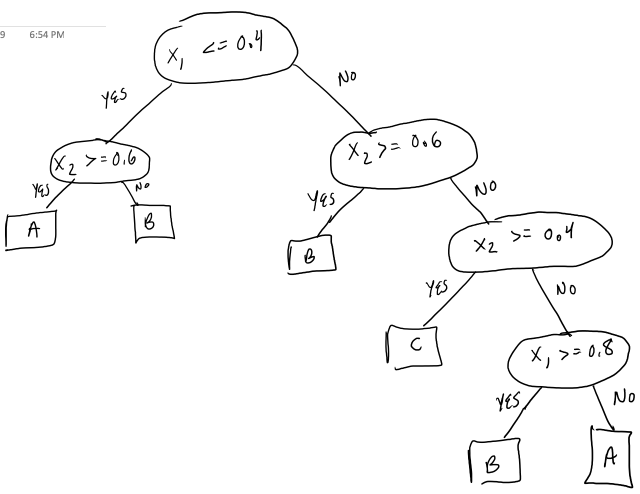

<img src = "dtree.png" width="600">

**(b)** Consider the following training data for predicting whether there will be traffic congestion on a given segment of an interstate highway. Each data point corresponds to a particular time of day and is classified either as positive (if the highway segment was  congested) or negative (if it was not congested) class. Suppose you are interested in building a decision tree classifier on the training data. Compute the overall Gini index for each predictor attribute (construction and weather condition) and select the best attribute to partition the training data. 

<img src = "congestion.jpg" width="350">

**Solution:**
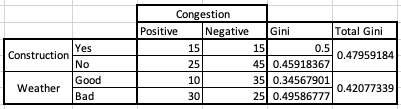

Best attribute to partition the training data is the weather condition

**6.** Classifier Evaluation

**(a)** Consider the decision tree shown below for classifying a dataset that contains examples that belong to 2 classes (positive or negative). The distribution of training examples that were assigned to each leaf node is also shown in the diagram. Draw a 2 $\times$ 2 confusion matrix of the tree.

<img src = "dtree2.jpg" width="300">

**Solution:**

confusionMatrix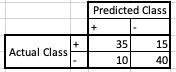

**(b)** Calculate the training error rate of the decision tree.

**Solution:**

In [15]:
incorrectPositivePredictions = 15
incorrectNegativePredictions = 10
totalSum = 35+15+10+40
errorRate = (incorrectNegativePredictions + incorrectPositivePredictions)/totalSum
print("Training Error Rate: {:.2%}".format(errorRate))



Training Error Rate: 25.00%


**(c)** Calculate the F1-measure of the tree for the training data.

**Solution:**

In [16]:
correctPositivePredictions = 35
positivePredictions = 35+10
positiveInstances = 35+15
p = correctPositivePredictions/positivePredictions
r = correctPositivePredictions/positiveInstances
f1 = 2*r*p/(r+p)
print("p = {:.2%}".format(p))
print("r = {:.2%}".format(r))
print("f1 = {:.2%}".format(f1))

p = 77.78%
r = 70.00%
f1 = 73.68%
